## 0.0 Importing necessary libraries and prerequisite.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c playground-series-s4e8 --force

 85% 70.0M/82.3M [00:00<00:00, 121MB/s] 
100% 82.3M/82.3M [00:00<00:00, 105MB/s]


In [8]:
!sudo unzip /content/playground-series-s4e8.zip

Archive:  /content/playground-series-s4e8.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Loading the Dataset
* Checking the dtypes
* Checking null values
*  replacing null values `{objects:"unknown", integers:-1}`

In [9]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


<Axes: >

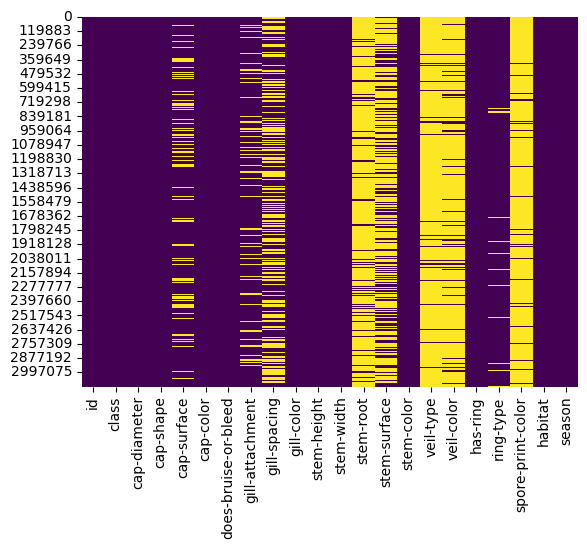

In [10]:
# plotting heatmap of missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")

In [11]:
# Dropping "id" column
train_data.drop(columns=["id"], inplace=True)

In [12]:
# Seperating categorical columns and numerical columns
categorical_columns = train_data.select_dtypes(exclude=np.number).columns.tolist()
numerical_columns = train_data.select_dtypes(include=np.number).columns.tolist()
categorical_columns.remove("class")
# Amount of columns in each data type
print(f"Number of categorical columns = {len(categorical_columns)}\n")
print(categorical_columns)
print(f"\n Number of numerical columns = {len(numerical_columns)}\n")
print(numerical_columns)

Number of categorical columns = 17

['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

 Number of numerical columns = 3

['cap-diameter', 'stem-height', 'stem-width']


In [13]:
# Replacing null values
train_data[categorical_columns] = train_data[categorical_columns].fillna("unknown")
train_data[numerical_columns] = train_data[numerical_columns].fillna(-1)
# Checking for any leftovers
train_data.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,0


<Axes: >

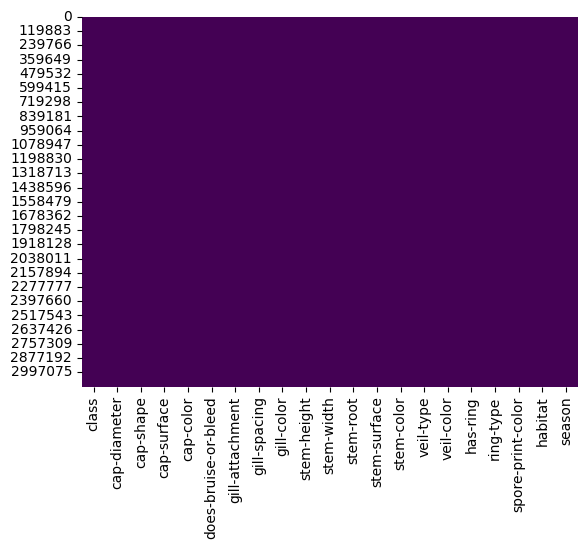

In [14]:
# plotting heatmap of missing values again
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")

## Seperating trainable values from target values
* Creating X and y Dataframes
* Transforming the values in X so our model can work with it
* We don't necessary need to transform y

In [15]:
# Seperating trainable values from target values
X = train_data.drop(columns=["class"])
y = train_data["class"]

In [16]:
# Using LabelEncoder to get rid of object values
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

In [17]:
# Scaling the values so our model can work better
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.53460632, -1.11167425,  0.26446289, ...,  0.2428523 ,
        -0.53332252, -0.95400223],
       [-0.38640284,  0.89811671, -1.15667713, ...,  0.2428523 ,
        -0.53332252,  1.76275518],
       [ 0.13528766, -1.11167425,  0.26446289, ...,  0.2428523 ,
         2.10115286,  1.76275518],
       ...,
       [ 0.32421262,  0.89811671, -1.42314088, ...,  0.2428523 ,
        -0.53332252, -0.95400223],
       [ 0.67415316,  0.05188894, -0.89021337, ...,  0.2428523 ,
        -0.53332252,  0.85716937],
       [-0.6676434 ,  0.89811671,  0.26446289, ...,  0.2428523 ,
         0.42466853,  0.85716937]])

# Preparing our data for training and validation
* splitting the data into train and test splits
* Using `RandomForestClassifier` for training
* fitting the model and evaluating the model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
val_pred = rfc.predict(X_val)
print(accuracy_score(val_pred, y_val))

0.9913087975565819


## Normalizing our test dataset just like the train dataset
* Filling Nan values and checking for any leftovers
* Transforming the values into smaller numbers
* Predicting the values and Saving our Submission

In [20]:
test_data_id = test_data["id"]
test_data.drop(columns=["id"], inplace=True)
test_data[categorical_columns] = test_data[categorical_columns].fillna("unknown")
test_data[numerical_columns] = test_data[numerical_columns].fillna(-1)
test_data.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,0
stem-width,0


In [21]:
for col in categorical_columns:
    test_data[col] = le.fit_transform(test_data[col])
test_data = scaler.fit_transform(test_data)
submission = rfc.predict(test_data)
submission

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [22]:
submission_final = pd.DataFrame({"id":test_data_id,
                                 "class":submission})
submission_final.set_index("id", inplace=True)
submission_final.to_csv("submission.csv")